# CS 513 - Knowledge Discovery and Data Mining: Final Project

## Dataset: Kickstarter Projects (URL: https://www.kaggle.com/kemical/kickstarter-projects)

### Kickstarter is a global crowdsourcing platform that raises money for a project or an idea. The objective of this project is to predict whether a kickstarter project will be successfull or not

In [1]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Pre-Processing (Loading and cleaning the dataset)

In [2]:
# Load the dataset
df = pd.read_csv('revised_kickstarter.csv')
df.head()

,ID,name,main_category,currency,launched,deadline,days,backers,usd_pledged_real,usd_goal_real,state
0,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-09-02 04:43:57,2017-11-01,60,15,2421.0,30000.0,failed
1,1000004038,Where is Hank?,Film & Video,USD,2013-01-12 00:20:50,2013-02-26,45,3,220.0,45000.0,failed
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-03-17 03:24:11,2012-04-16,30,1,1.0,5000.0,failed
3,1000014025,Monarch Espresso Bar,Food,USD,2016-02-26 13:38:27,2016-04-01,35,224,52375.0,50000.0,successful
4,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,2014-12-01 18:30:44,2014-12-21,20,16,1205.0,1000.0,successful


#### Check missing values in all columns

In [3]:
# Check Missing Values
df.isnull().sum()

ID                  0
name                3
main_category       0
currency            0
launched            0
deadline            0
days                0
backers             0
usd_pledged_real    0
usd_goal_real       0
state               0
dtype: int64

#### ID, Name, Currency, Launched and Deadline columns does not contribut to a project's success

In [4]:
# Drop unimportant columns
df = df.drop(['ID','name','currency', 'launched', 'deadline'], axis= 1)
df.head()

,main_category,days,backers,usd_pledged_real,usd_goal_real,state
0,Film & Video,60,15,2421.0,30000.0,failed
1,Film & Video,45,3,220.0,45000.0,failed
2,Music,30,1,1.0,5000.0,failed
3,Food,35,224,52375.0,50000.0,successful
4,Food,20,16,1205.0,1000.0,successful


#### Check unique values in target variable

In [5]:
df['state'].value_counts()

failed        158977
successful    133851
Name: state, dtype: int64

#### Convert categorical target variable to binary values 

In [6]:
# Convert state to binary labels
le = LabelEncoder()
df['state'] =le.fit_transform(df['state'])
df['state'].value_counts()

0    158977
1    133851
Name: state, dtype: int64

#### Corelation Matrix

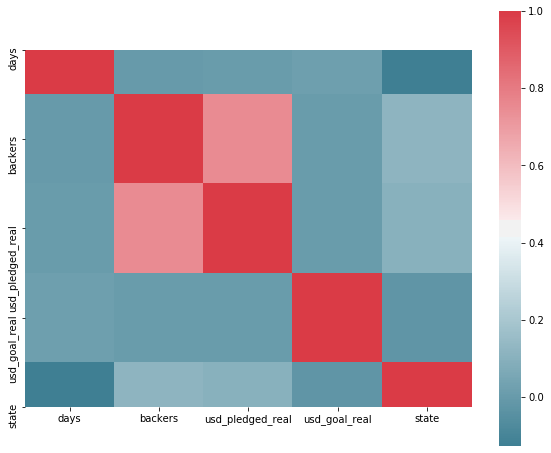

In [7]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
correlations = df.corr()
sns.heatmap(correlations, mask=np.zeros_like(correlations, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### Encode categorical data ('main_category' = 0)

In [8]:
# Encode categorical data ('main_category' = 0)
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [0])], remainder='passthrough')
processed_data = ct.fit_transform(df)
pd.DataFrame(processed_data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,15.0,2421.0,30000.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,3.0,220.0,45000.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,1.0,1.0,5000.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,224.0,52375.0,50000.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,16.0,1205.0,1000.0,1.0


#### Split data into training set and testing set based on 70:30 ratio

In [9]:
# Split data into training set and testing set based on 70:30 ratio
x = processed_data[:, 1:-1]  # Independent Variable. Not including the first column to ignore the dummy variable
y = processed_data[:, -1]    # Dependent Variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 109)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((204979, 18), (87849, 18), (204979,), (87849,))

## 2. Classification Models
### 2.1. Gaussian Naive Bayes

In [10]:
# Gaussian Naive Bayes, because 'days' follows Gaussian distribution. 
# ['usd_pledged_real', 'usd_goal_real', 'backers'] does not follow gaussian distribution
# Hence the accuracy is low
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes Confusion Matrix:\n", pd.crosstab(y_test, gnb_pred, rownames=['True'], colnames=['Predicted']))
print("\nGaussian Naive Bayes Accuracy:", accuracy_score(y_test, gnb_pred))

Gaussian Naive Bayes Confusion Matrix:
 Predicted    0.0    1.0
True                   
0.0        46787    855
1.0        28266  11941

Gaussian Naive Bayes Accuracy: 0.6685107400198067


### 2.2. Multinomial Naive Bayes

In [11]:
# Multinomial NB because main_category follows multinomially distribution
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)
print("Multinomial Naive Bayes Confusion Matrix:\n", pd.crosstab(y_test, mnb_pred, rownames=['True'], colnames=['Predicted']))
print("\nMultinomial Naive Bayes Accuracy:", accuracy_score(y_test, mnb_pred))

Multinomial Naive Bayes Confusion Matrix:
 Predicted    0.0    1.0
True                   
0.0        43260   4382
1.0            0  40207

Multinomial Naive Bayes Accuracy: 0.9501189541144464


### 2.3. Random Forest Classifier

In [12]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Confusion Matrix:\n", pd.crosstab(y_test, rf_pred, rownames=['True'], colnames=['Predicted']))
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Confusion Matrix:
 Predicted    0.0    1.0
True                   
0.0        47363    279
1.0            7  40200

Random Forest Accuracy: 0.9967444137098885


### Random Forest Feature Importance 

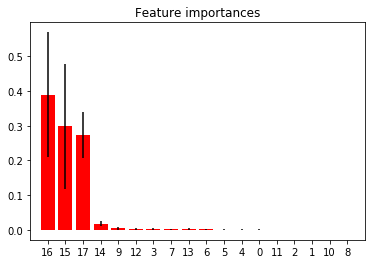

In [13]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(rf.feature_importances_)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), rf.feature_importances_[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

### 2.4. K-Nearest Neighbors

In [14]:
# K nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("K-Nearest Neighbors Confusion Matrix:\n", pd.crosstab(y_test, knn_pred, rownames=['True'], colnames=['Predicted']))
print("\nK-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_pred))

K-Nearest Neighbors Confusion Matrix:
 Predicted    0.0    1.0
True                   
0.0        47605     37
1.0            1  40206

K-Nearest Neighbors Accuracy: 0.9995674395838313


### 2.5. Decision Tree Classifier

In [15]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
print("Decision Tree Confusion Matrix:\n", pd.crosstab(y_test, dtree_pred, rownames=['True'], colnames=['Predicted']))
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dtree_pred))

Decision Tree Confusion Matrix:
 Predicted    0.0    1.0
True                   
0.0        47587     55
1.0           29  40178

Decision Tree Accuracy: 0.9990438138168903


#### Save Decision Tree to pdf ('D_tree.pdf')

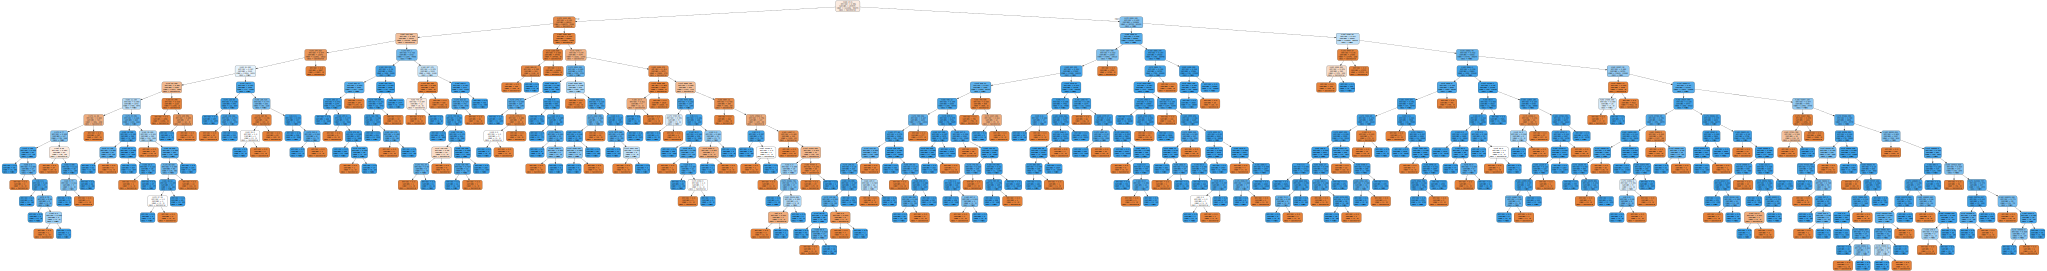

In [16]:
# Plot and save decision tree 
# conda install python-graphviz
import graphviz 
dot_data = export_graphviz(dtree, out_file=None,  
                      class_names=['Successfull', 'Failed'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("D_tree") 
graph

### 2.6. Artificial Neural Network

In [17]:
# Artificial Neural Network
# pip install tensorflow (This notebok uses tensorflow 2.0)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, activation='relu', input_dim = 18))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=50, batch_size=64, verbose=1)
y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

Train on 204979 samples
Epoch 1/50
204979/204979 [==============================] - 3s 16us/sample - loss: 16.8067 - accuracy: 0.9892
Epoch 2/50
204979/204979 [==============================] - 3s 15us/sample - loss: 0.0178 - accuracy: 0.9994
Epoch 3/50
204979/204979 [==============================] - 3s 13us/sample - loss: 0.0353 - accuracy: 0.9994
Epoch 4/50
204979/204979 [==============================] - 3s 13us/sample - loss: 0.0288 - accuracy: 0.9994
Epoch 5/50
204979/204979 [==============================] - 3s 13us/sample - loss: 0.0233 - accuracy: 0.9996
Epoch 6/50
204979/204979 [==============================] - 3s 13us/sample - loss: 0.0208 - accuracy: 0.9993
Epoch 7/50
204979/204979 [==============================] - 3s 13us/sample - loss: 0.0144 - accuracy: 0.9990
Epoch 8/50
204979/204979 [==============================] - 3s 13us/sample - loss: 0.0108 - accuracy: 0.9991
Epoch 9/50
204979/204979 [==============================] - 3s 13us/sample - loss: 0.0041 - accuracy: 0

In [18]:
print("Artificial Neural Network Confusion Matrix:\n", pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted']))
print("\nArtificial Neural Network Accuracy:", accuracy_score(y_test, y_pred))

Artificial Neural Network Confusion Matrix:
 Predicted    0.0    1.0
True                   
0.0        47633      9
1.0            1  40206

Artificial Neural Network Accuracy: 0.9998861683115345


### 3. Comparing Models

In [19]:
pd.DataFrame([
        {"Model": "Gaussian Naive Bayes",      "Accuracy":  accuracy_score(y_test, gnb_pred)},
        {"Model": "Multinomial Naive Bayes",   "Accuracy":  accuracy_score(y_test, mnb_pred)},
        {"Model": "Random Forest Classifier",  "Accuracy":  accuracy_score(y_test, rf_pred)},
        {"Model": "K-nearest Neighbors",       "Accuracy":  accuracy_score(y_test, knn_pred)},
        {"Model": "Decision Tree Classifier",  "Accuracy":  accuracy_score(y_test, dtree_pred)},
        {"Model": "Artificial Neural Network", "Accuracy":  accuracy_score(y_test, y_pred.round())}
    ], index=range(1, 7))

,Model,Accuracy
1,Gaussian Naive Bayes,0.668511
2,Multinomial Naive Bayes,0.950119
3,Random Forest Classifier,0.996744
4,K-nearest Neighbors,0.999567
5,Decision Tree Classifier,0.999044
6,Artificial Neural Network,0.999886
